In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
# 1. Data Import and Preprocessing
# Load the data
train_df = pd.read_csv('train.csv')

# Split features and target
X = train_df.drop('label', axis=1)  # Features (pixel values)
y = train_df['label']  # Target (labels)

# Normalize the pixel values to 0-1 range
X = X / 255.0

# Reshape the data for CNN input (28x28x1)
X_cnn = X.values.reshape(-1, 28, 28, 1)

# One-hot encode the labels for CNN
y_cnn = to_categorical(y, num_classes=10)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

print("Data imported and preprocessed successfully!")


Data imported and preprocessed successfully!


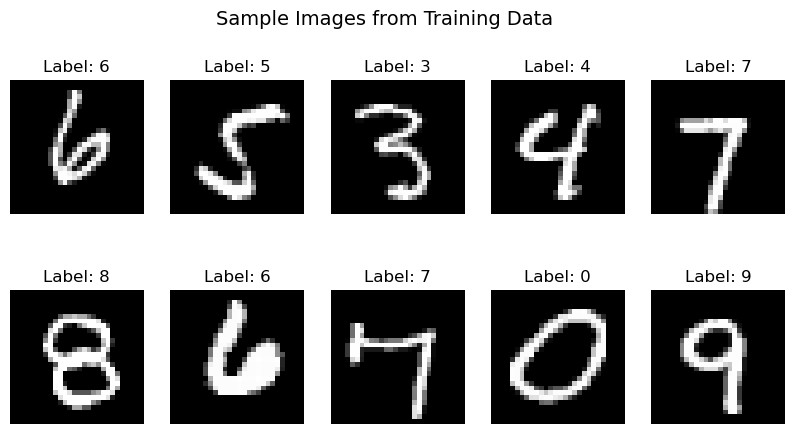

In [4]:
# 2. Data Visualization
# Display some sample images and their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle('Sample Images from Training Data', fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {np.argmax(y_train[i])}")

plt.show()


In [7]:
# 3. Model Selection and Training
# Logistic Regression
print("Training Logistic Regression Model...")
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
X_val_flat = X_val.reshape(X_val.shape[0], -1)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flat, np.argmax(y_train, axis=1))

# Evaluate Logistic Regression
y_val_pred = log_reg.predict(X_val_flat)
accuracy_log = accuracy_score(np.argmax(y_val, axis=1), y_val_pred)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")

# Support Vector Machine (SVM)
print("Training SVM Model...")
svm = SVC(kernel='rbf', C=10)
svm.fit(X_train_flat, np.argmax(y_train, axis=1))

# Evaluate SVM
y_val_pred_svm = svm.predict(X_val_flat)
accuracy_svm = accuracy_score(np.argmax(y_val, axis=1), y_val_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")


Training Logistic Regression Model...
Logistic Regression Accuracy: 0.9188
Training SVM Model...
SVM Accuracy: 0.9799


In [9]:
# Convolutional Neural Network (CNN)
print("Training CNN Model...")
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluate CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_val, y_val)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")


Training CNN Model...
Epoch 1/10


C:\Users\19216\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7729 - loss: 0.6998 - val_accuracy: 0.9739 - val_loss: 0.0822
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9628 - loss: 0.1271 - val_accuracy: 0.9794 - val_loss: 0.0615
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9746 - loss: 0.0879 - val_accuracy: 0.9802 - val_loss: 0.0589
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9798 - loss: 0.0683 - val_accuracy: 0.9856 - val_loss: 0.0439
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9796 - loss: 0.0639 - val_accuracy: 0.9863 - val_loss: 0.0388
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9845 - loss: 0.0483 - val_accuracy: 0.9880 - val_loss: 0.0402
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9868 - loss: 0.0432 - val_accuracy: 0.9879 - val_loss: 0.0362
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9882 - loss: 0.0394 - val_accuracy: 0.9888 - val_

In [11]:
# 4. Compare Model Performance
print("\nModel Performance Summary:")
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")



Model Performance Summary:
Logistic Regression Accuracy: 0.9188
SVM Accuracy: 0.9799
CNN Accuracy: 0.9898


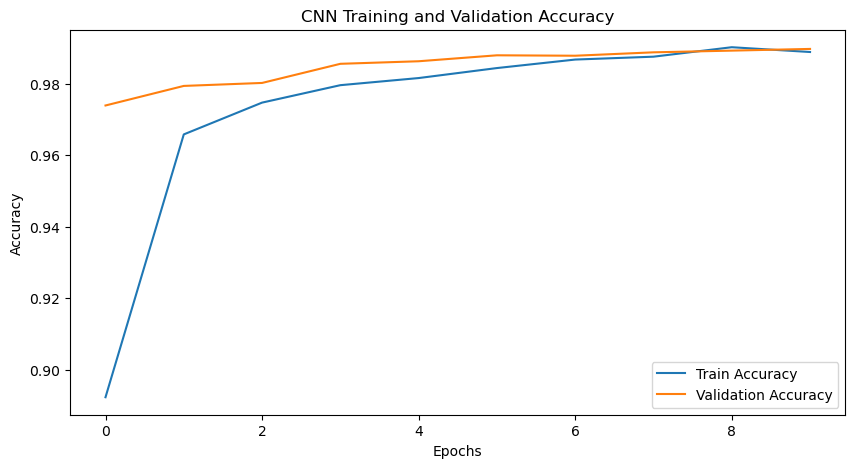

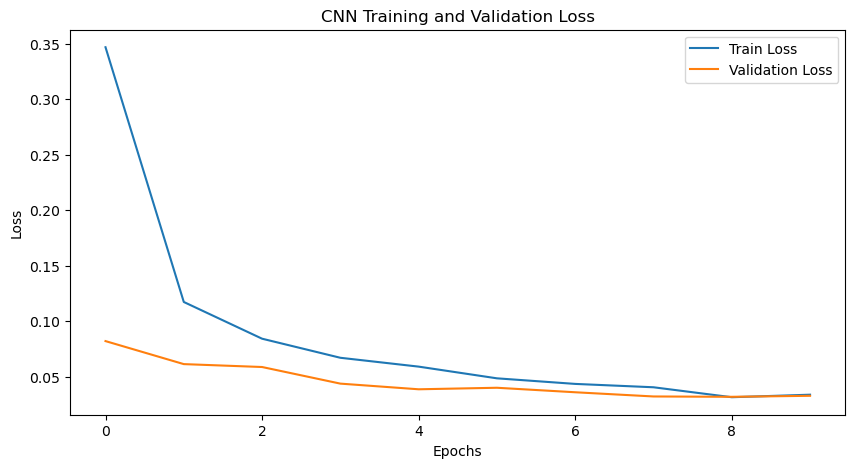

In [13]:
# 5. Visualize CNN Training Process
plt.figure(figsize=(10, 5))
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Confusion Matrix for Logistic Regression


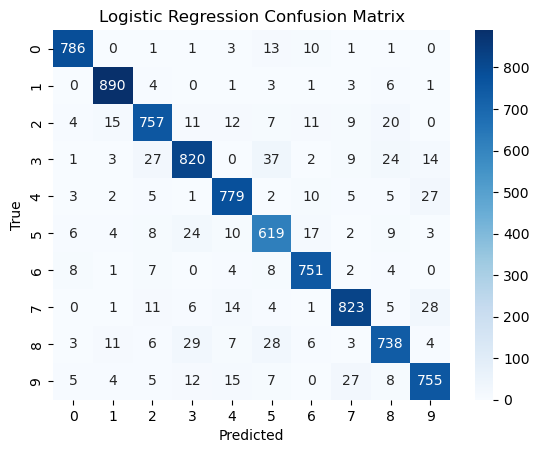


Confusion Matrix for SVM


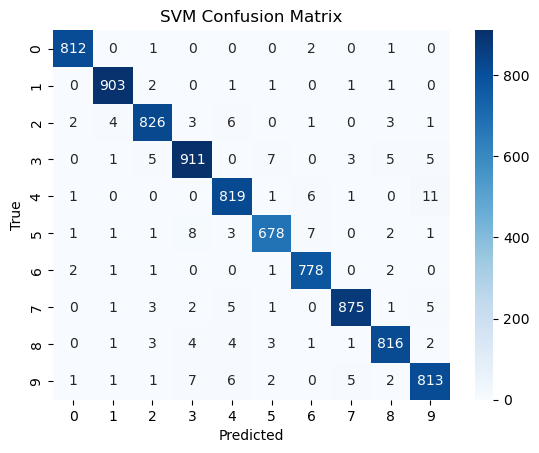

In [15]:
# 6. Confusion Matrix for Logistic Regression and SVM
import seaborn as sns

print("\nConfusion Matrix for Logistic Regression")
log_cm = confusion_matrix(np.argmax(y_val, axis=1), y_val_pred)
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nConfusion Matrix for SVM")
svm_cm = confusion_matrix(np.argmax(y_val, axis=1), y_val_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Confusion Matrix for CNN
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


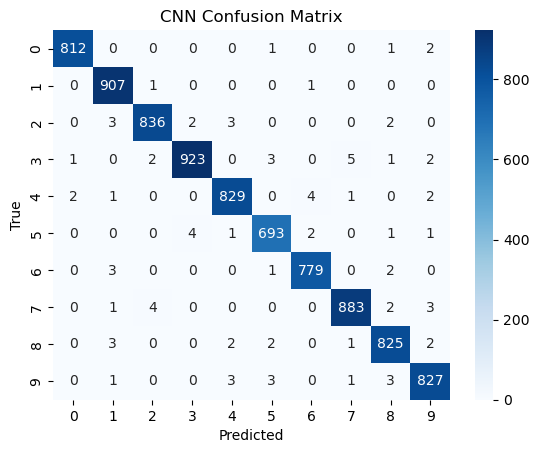

In [17]:
# 7. Confusion Matrix for CNN
print("\nConfusion Matrix for CNN")
y_val_pred_cnn = cnn_model.predict(X_val)
y_val_pred_cnn_classes = np.argmax(y_val_pred_cnn, axis=1)
true_classes = np.argmax(y_val, axis=1)
cnn_cm = confusion_matrix(true_classes, y_val_pred_cnn_classes)

sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [19]:
from sklearn.metrics import roc_auc_score

# Logistic Regression AUC
y_val_prob_log = log_reg.predict_proba(X_val_flat)
auc_log = roc_auc_score(np.argmax(y_val, axis=1), y_val_prob_log, multi_class='ovr')
print(f"Logistic Regression AUC: {auc_log:.4f}")

# CNN AUC
auc_cnn = roc_auc_score(true_classes, y_val_pred_cnn, multi_class='ovr')
print(f"CNN AUC: {auc_cnn:.4f}")


Logistic Regression AUC: 0.9929
CNN AUC: 0.9999


In [21]:
# 重新定义并训练 SVM
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

print("Re-training SVM with probability=True...")
svm = SVC(kernel='rbf', C=10, probability=True)
svm.fit(X_train_flat, np.argmax(y_train, axis=1))

# 预测验证集概率
y_val_prob_svm = svm.predict_proba(X_val_flat)

# 计算 AUC
auc_svm = roc_auc_score(np.argmax(y_val, axis=1), y_val_prob_svm, multi_class='ovr')
print(f"SVM AUC: {auc_svm:.4f}")


Re-training SVM with probability=True...
SVM AUC: 0.9996


In [29]:
# 8. Test Set Predictions and Submission
# Load the test data
test_df = pd.read_csv('test.csv')
X_test = test_df / 255.0  # Normalize the test data

# Reshape for CNN input
X_test_cnn = X_test.values.reshape(-1, 28, 28, 1)

# Predict using the CNN model
y_test_pred_cnn = cnn_model.predict(X_test_cnn)
y_test_pred_labels = np.argmax(y_test_pred_cnn, axis=1)

# Prepare the submission file
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(y_test_pred_labels) + 1),
    'Label': y_test_pred_labels
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Test set predictions saved to 'submission.csv'")


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test set predictions saved to 'submission.csv'
